## Building Real Processor

Processes all the data from Real Building and makes a Building from it.

In [3]:
%pip install pyarrow

Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
import pandas as pd
from pathlib import Path

# should we clean the data as well as structure it properly? Yes or no.
is_clean = True

directory = f"{os.getcwd()}/.."
file_name = "building_real__2023"
df = pd.read_csv(f"{directory}/00_raw/{file_name}.csv")
# to_hourly = True
df.head()

,Time,SMA-3008628305-EDMM_pAcGrid,SMA-3010507943-STP_pDcPV,SMA-3012104048-SI_pBat,SMA-3012104048-SI_pInBat,SMA-3012104048-SI_pOutBat,SMA-3012104048-SI_sOc,10000000846c766e-OM_pAcHome
0,2023-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023-01-01 01:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023-01-01 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023-01-01 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


: 

In [ ]:
# rename columns
df = df.rename(columns=
    {
        "SMA-3008628305-EDMM_pAcGrid": "grid_ac_power_watt", # energy (current * volt)
        "SMA-3010507943-STP_pDcPV": "pv_dc_power_watt",
        "SMA-3012104048-SI_pBat": "bat_dc_power_watt",
        "SMA-3012104048-SI_pInBat": "bat_dc_power_in_watt",
        "SMA-3012104048-SI_pOutBat": "bat_dc_power_out_watt",
        "SMA-3012104048-SI_sOc": "bat_soc_percent",
        "10000000846c766e-OM_pAcHome": "home_power_watt"
    }
)

: 

In [ ]:
df_clean = df.copy()
idx = pd.DatetimeIndex(df_clean["Time"]).tz_localize("Europe/Dublin", ambiguous="infer", nonexistent="shift_forward")
df_clean.index = idx
df_clean = df_clean.drop(columns="Time")
df_clean.index.rename("time")
df_clean.head(1)

,grid_ac_power_watt,home_power_watt,pv_dc_power_watt,bat_dc_power_watt,bat_dc_power_in_watt,bat_dc_power_out_watt,bat_soc_percent
Time,,,,,,,
2023-01-01 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


: 

In [ ]:
dupes_in_index = not df_clean.index.is_unique
print(df_clean.shape)
print("Duplicates in index?", dupes_in_index)
if dupes_in_index:
    raise Exception("There should not be dupes in index")

(8761, 7)
Duplicates in index? False


: 

In [ ]:
if is_clean:
    df_clean["bat_soc_percent"] = df_clean["bat_soc_percent"].ffill()
    df_clean = df_clean.fillna(0.0)
df_clean.head()

,grid_ac_power_watt,home_power_watt,pv_dc_power_watt,bat_dc_power_watt,bat_dc_power_in_watt,bat_dc_power_out_watt,bat_soc_percent
Time,,,,,,,
2023-01-01 00:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 01:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 02:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 03:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2023-01-01 04:00:00+00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0


: 

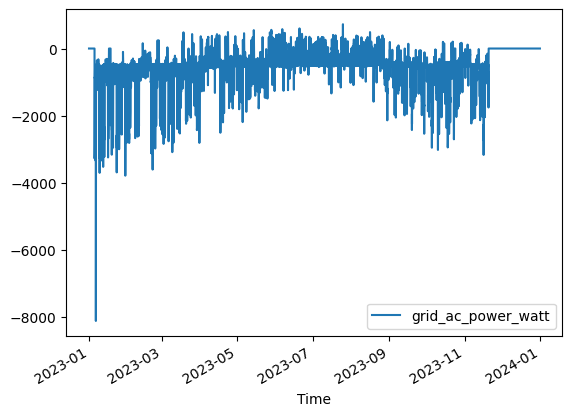

: 

In [ ]:
df_check = df_clean[["grid_ac_power_watt"]].copy()
if is_clean:
    df_check = df_check[["grid_ac_power_watt"]].fillna(0.0)
    df_check = df_check[df_check["grid_ac_power_watt"].abs() <= 100000]
df_check.plot();

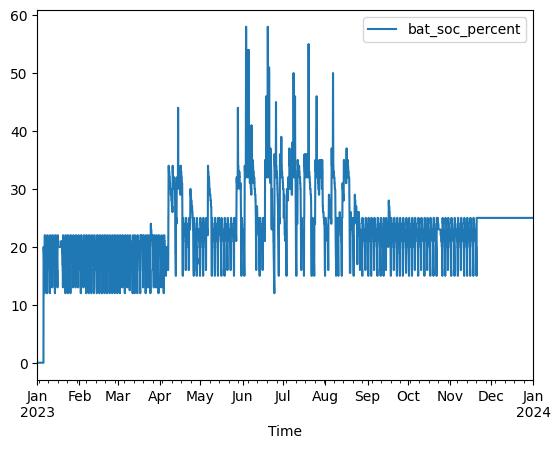

: 

In [ ]:
# plot the battery
df_clean[["bat_soc_percent"]].plot();

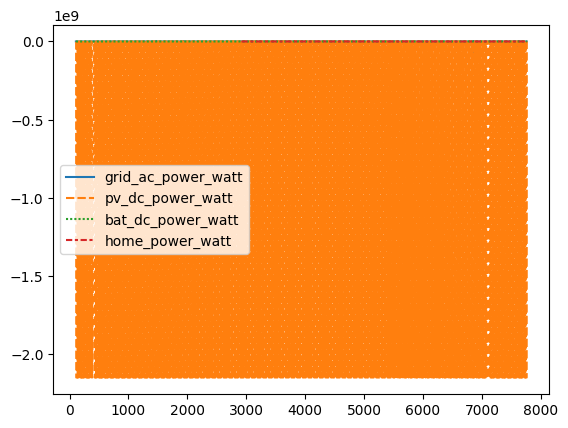

: 

In [ ]:
import seaborn as sns
sns.lineplot(data=df[["grid_ac_power_watt", "pv_dc_power_watt", "bat_dc_power_watt", "home_power_watt"]]);

In [ ]:
if is_clean:
    # remove extreme outliers
    max_min_value = 100000
    df_clean = df_clean.mask(df_clean > max_min_value, 0.0)
    df_clean = df_clean.mask(df_clean < -max_min_value, 0.0)

: 

Need to clean the data by removing negative values for PV - there's no such thing as negative solar!

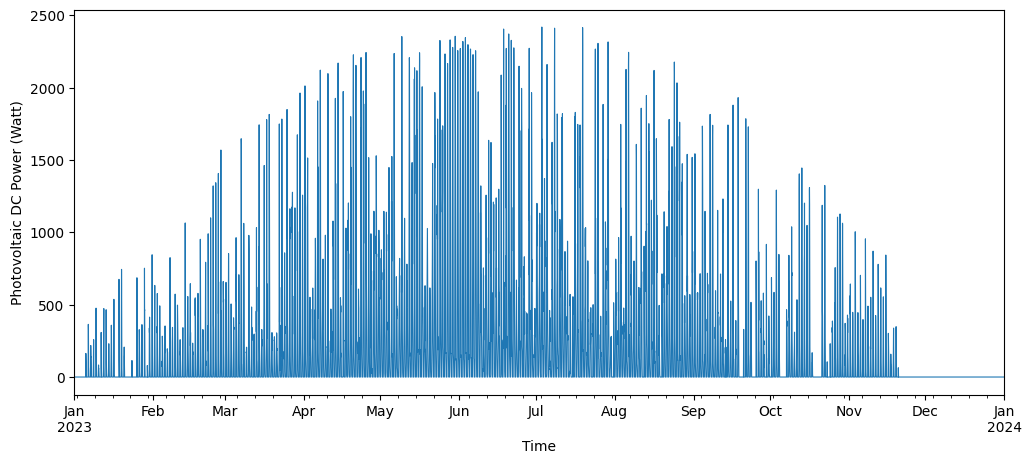

: 

In [ ]:
import matplotlib.pyplot as plt
if is_clean:
    df_clean["pv_dc_power_watt"] = df_clean["pv_dc_power_watt"].mask(df_clean["pv_dc_power_watt"] < 0).fillna(0)

df_copy = df_clean.copy()
df_copy['pv_dc_power_watt'].plot(figsize=(12, 5), linewidth=0.8)
plt.ylabel('Photovoltaic DC Power (Watt)')
plt.show()

Also need to clean by removing outliers in home power watt.

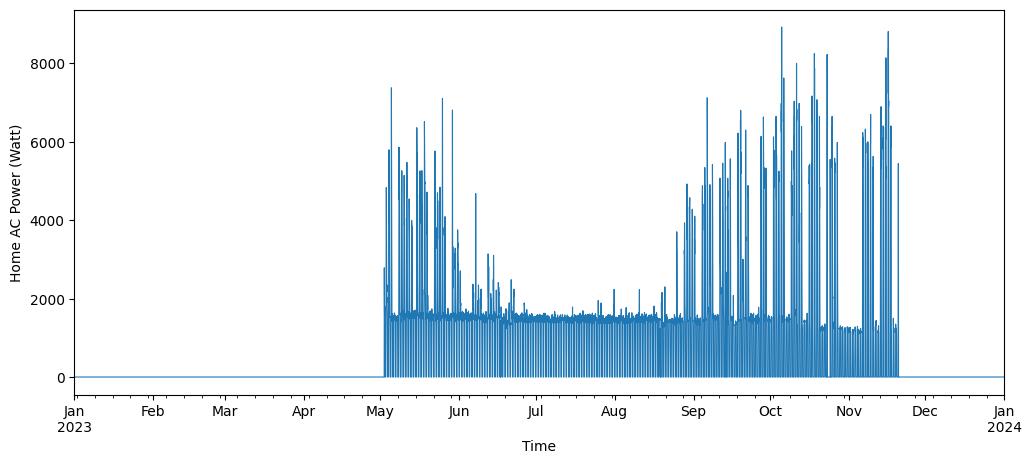

: 

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

df_copy['home_power_watt'].plot(figsize=(12, 5), linewidth=0.8)
plt.ylabel('Home AC Power (Watt)')
plt.show()

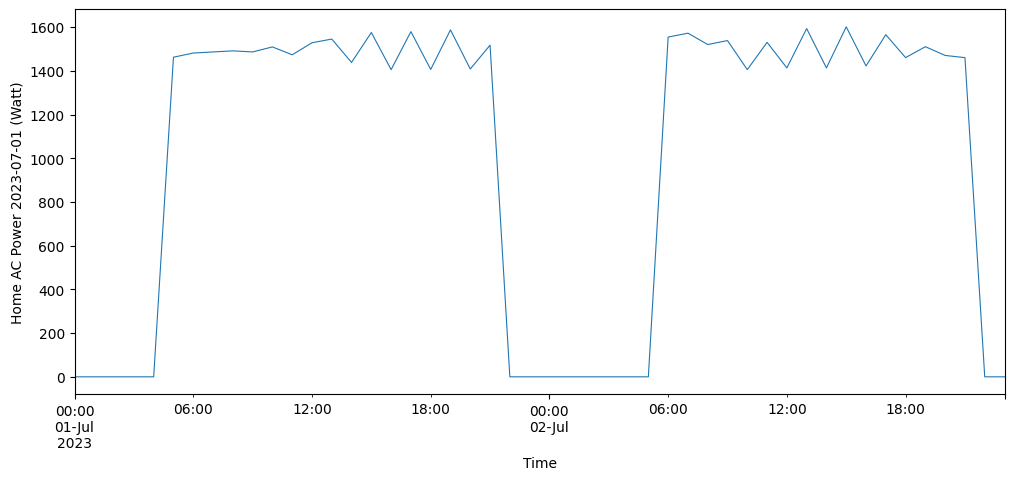

: 

In [ ]:
df_copy['home_power_watt'].loc["2023-07-01":"2023-07-02"].plot(figsize=(12, 5), linewidth=0.8)
plt.ylabel('Home AC Power 2023-07-01 (Watt)')
plt.show()

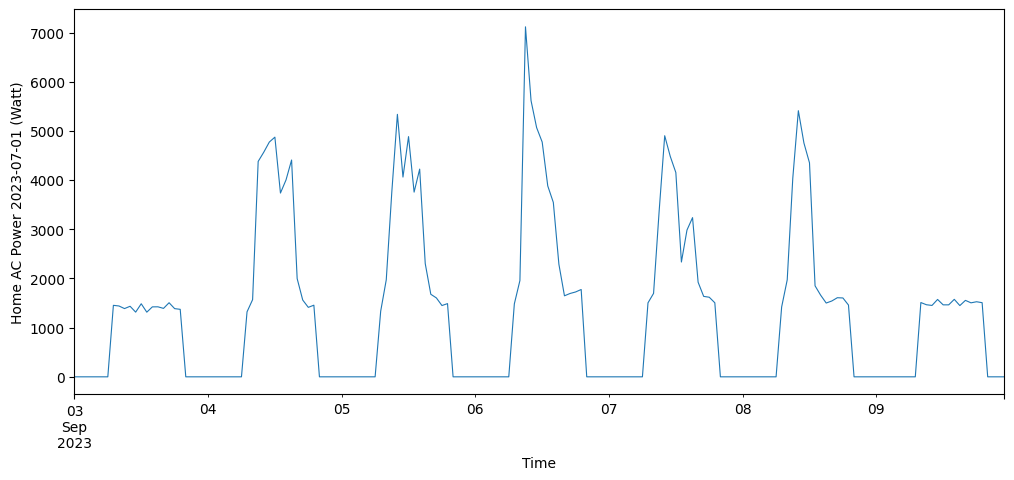

: 

In [ ]:
df_copy['home_power_watt'].loc["2023-09-03":"2023-09-09"].plot(figsize=(12, 5), linewidth=0.8)
plt.ylabel('Home AC Power 2023-07-01 (Watt)')
plt.show()

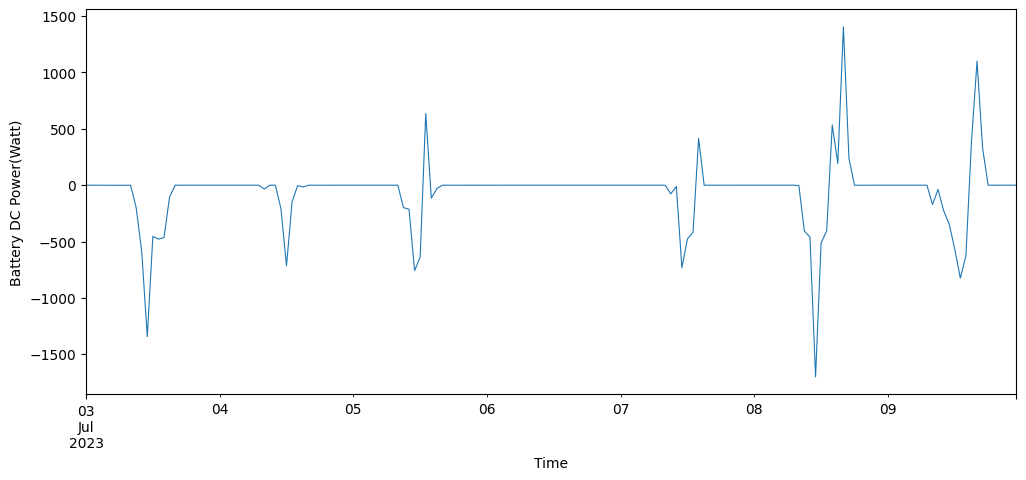

: 

In [ ]:
df_copy['bat_dc_power_watt'].loc["2023-07-03":"2023-07-09"].plot(figsize=(12, 5), linewidth=0.8)
plt.ylabel('Battery DC Power(Watt)')
plt.show()

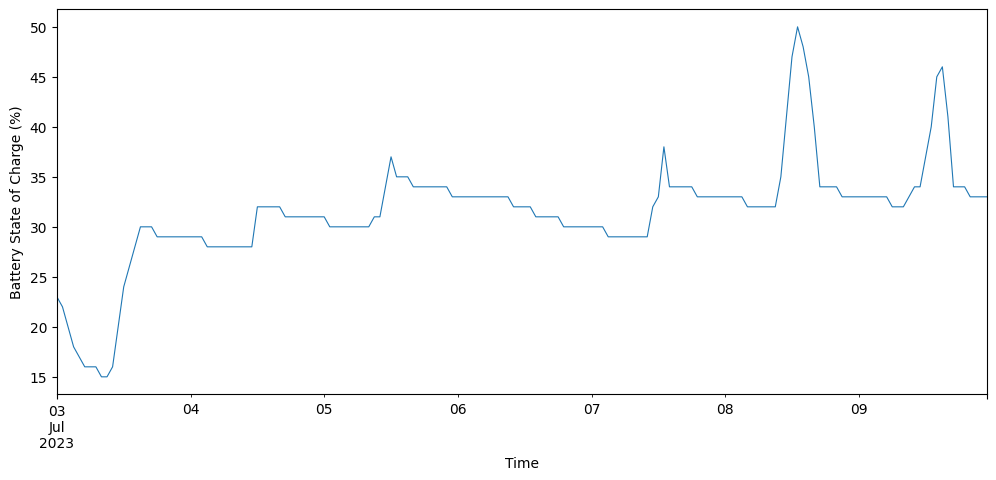

: 

In [ ]:
df_copy['bat_soc_percent'].loc["2023-07-03":"2023-07-09"].plot(figsize=(12, 5), linewidth=0.8)
plt.ylabel('Battery State of Charge (%)')
plt.show()

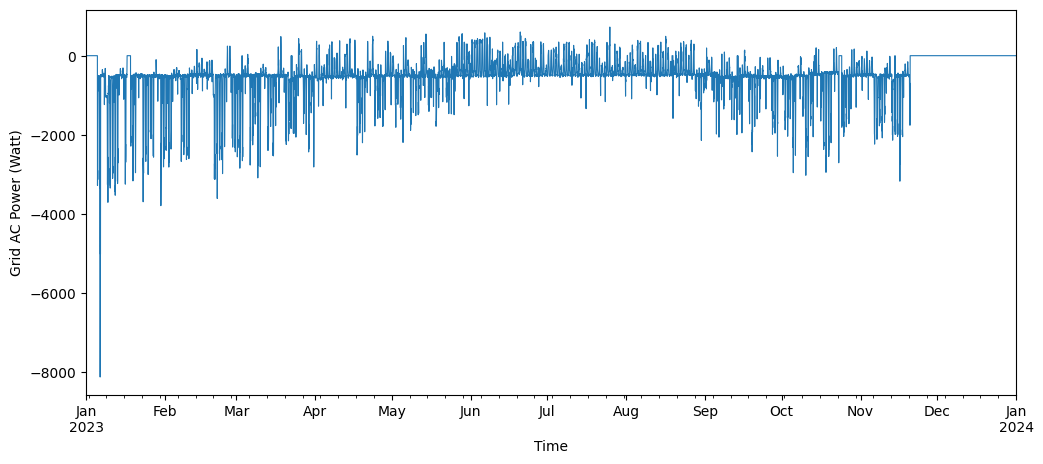

: 

In [ ]:
import matplotlib.pyplot as plt
df_copy['grid_ac_power_watt'].plot(figsize=(12, 5), linewidth=0.8)
plt.ylabel('Grid AC Power (Watt)')
plt.show()

/tmp/ipykernel_98050/1097580921.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_clean_pwr = df_clean_pwr[df_clean["home_power_watt"] < 8000]


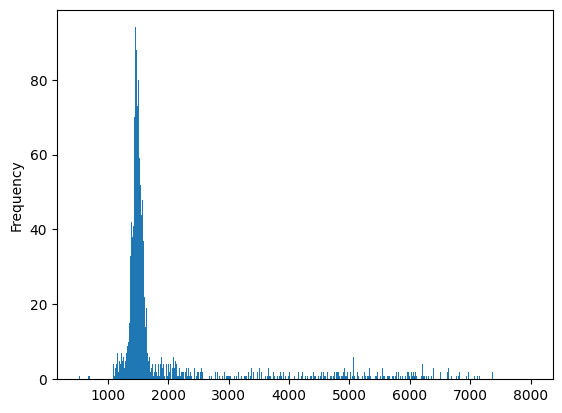

: 

In [ ]:
# find out min value for above 0 for home power watt
if is_clean:
    df_clean_pwr = df_clean[df_clean["home_power_watt"] > 0]
    df_clean_pwr = df_clean_pwr[df_clean["home_power_watt"] < 8000]
    df_clean_pwr["home_power_watt"].plot.hist(column=["home_power_watt"], bins=1000);
else:
    df_clean_pwr = df_clean.copy()
    df_clean_pwr["home_power_watt"].plot.hist(column=["home_power_watt"], bins=1000);

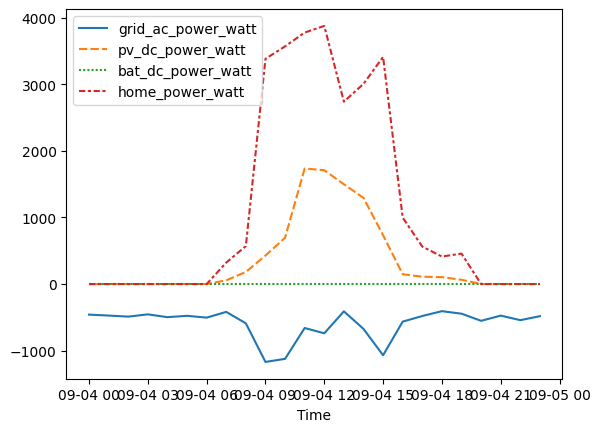

: 

In [ ]:
import matplotlib.pyplot as plt
if is_clean:
    df_clean["home_power_watt"] = df_clean["home_power_watt"].sub(1000).where(df_clean["home_power_watt"] > 0, df_clean["home_power_watt"])
sns.lineplot(data=df_clean[["grid_ac_power_watt", "pv_dc_power_watt", "bat_dc_power_watt", "home_power_watt"]].loc["2023-09-04":"2023-09-04"]);
plt.show()

In [ ]:
# replace negative values with 0
if is_clean:
    df_clean["home_power_watt"] = df_clean["home_power_watt"].clip(lower=0)
    # replace 0 with values from grid
    df_clean.loc[df_clean["home_power_watt"] == 0.0, "home_power_watt"] = -df_clean["grid_ac_power_watt"] - df_clean["pv_dc_power_watt"] + df_clean["bat_dc_power_watt"]
    df_clean["home_power_watt"] = df_clean["home_power_watt"].clip(lower=0)


: 

Now the power overnight is being simulated

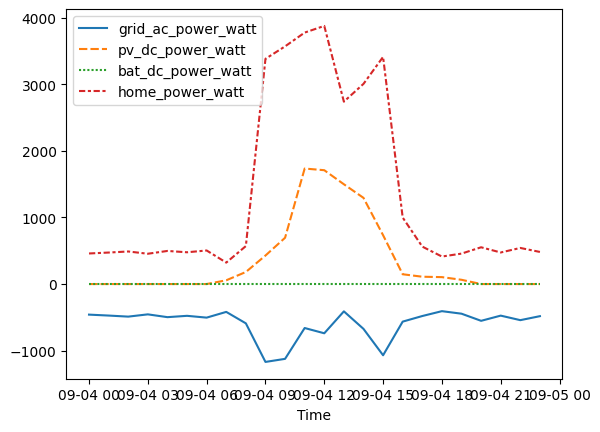

: 

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(data=df_clean[["grid_ac_power_watt", "pv_dc_power_watt", "bat_dc_power_watt", "home_power_watt"]].loc["2023-09-04":"2023-09-04"]);
plt.show()

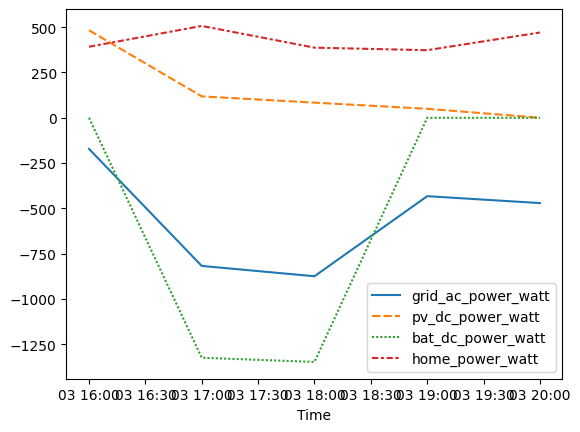

: 

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(data=df_clean[["grid_ac_power_watt", "pv_dc_power_watt", "bat_dc_power_watt", "home_power_watt"]].loc["2023-09-03 16:00":"2023-09-03 20:00"]);
plt.show()

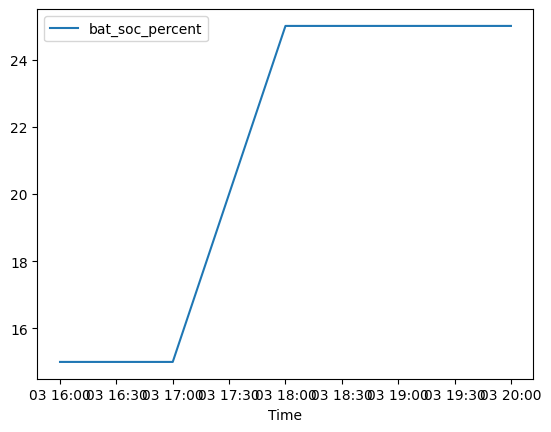

: 

In [ ]:
import matplotlib.pyplot as plt
sns.lineplot(data=df_clean[["bat_soc_percent"]].loc["2023-09-03 16:00":"2023-09-03 20:00"]);
plt.show()

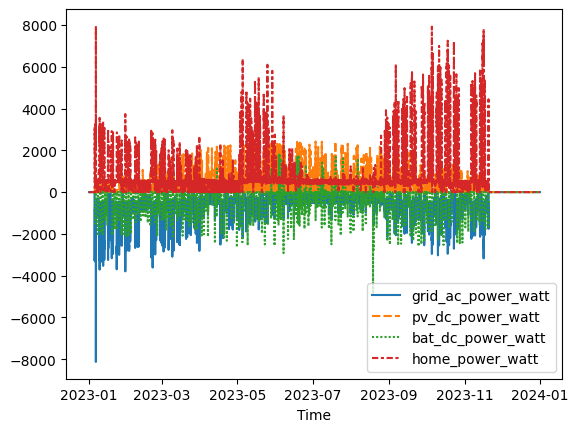

: 

In [ ]:
sns.lineplot(data=df_clean[["grid_ac_power_watt", "pv_dc_power_watt", "bat_dc_power_watt", "home_power_watt"]]);

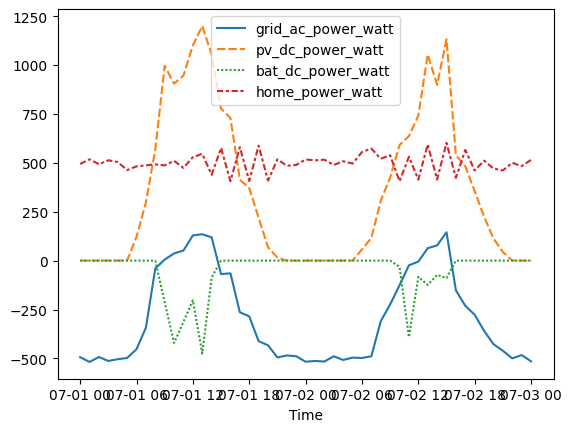

: 

In [ ]:
# show just two days of data to illustrate what's going on.
start_date = '2023-07-01'
end_date = '2023-07-03'
after_start_date = df_clean.index >= start_date
before_end_date = df_clean.index <= end_date
between_two_dates = after_start_date & before_end_date
day_df = df_clean.loc[between_two_dates]
sns.lineplot(data=day_df[["grid_ac_power_watt", "pv_dc_power_watt", "bat_dc_power_watt", "home_power_watt"]]);

In [ ]:
df_clean.to_parquet("building_real__original_data.parquet", index=True)

: 

# Put into CityLearn Format

Put the data into CityLearn format

In [ ]:
import pandas as pd

df_citylearn = pd.DataFrame(index=df_clean.index)
df_citylearn["date"] = pd.DatetimeIndex(df_clean.index).date
df_citylearn["month"] = pd.DatetimeIndex(df_clean.index).month
df_citylearn["hour"] = pd.DatetimeIndex(df_clean.index).hour + 1 # needs to be 1-24, not 0-23, so add 1
df_citylearn["day_type"] = pd.DatetimeIndex(df_clean.index).dayofweek
df_citylearn["datetime_local"] = pd.DatetimeIndex(df_clean.index)
df_citylearn["daylight_savings_status"] = df_citylearn["datetime_local"].apply(
    lambda ts: int(ts.utcoffset() != pd.Timedelta(0))
)
df_citylearn["indoor_dry_bulb_temperature"] = 0.0
df_citylearn["average_unmet_cooling_setpoint_difference"] = 0.0
df_citylearn["indoor_relative_humidity"] = 0.0
df_citylearn["non_shiftable_load"] = df_clean["home_power_watt"] / 1000 # kW consumed
df_citylearn["dhw_demand"] = 0.0
df_citylearn["cooling_demand"] = 0.0
df_citylearn["heating_demand"] = 0.0
df_citylearn["solar_generation"] = df_clean["pv_dc_power_watt"]
df_citylearn["occupant_count"] = 0.0
df_citylearn["indoor_dry_bulb_temperature_cooling_set_point"] = 0.0
df_citylearn["indoor_dry_bulb_temperature_heating_set_point"] = 0.0
df_citylearn["hvac_mode"] = 0
df_citylearn.head()

,date,month,hour,day_type,datetime_local,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_cooling_set_point,indoor_dry_bulb_temperature_heating_set_point,hvac_mode
Time,,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00+00:00,2023-01-01,1,1,6,2023-01-01 00:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-01 01:00:00+00:00,2023-01-01,1,2,6,2023-01-01 01:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-01 02:00:00+00:00,2023-01-01,1,3,6,2023-01-01 02:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-01 03:00:00+00:00,2023-01-01,1,4,6,2023-01-01 03:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-01 04:00:00+00:00,2023-01-01,1,5,6,2023-01-01 04:00:00+00:00,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


: 

In [ ]:
df = df_citylearn

# add datetime
df["datetime"] = df["datetime_local"]
df.index = df["datetime"]
df = df.drop(columns=["datetime_local", "datetime", "date"])
df.head()

,month,hour,day_type,daylight_savings_status,indoor_dry_bulb_temperature,average_unmet_cooling_setpoint_difference,indoor_relative_humidity,non_shiftable_load,dhw_demand,cooling_demand,heating_demand,solar_generation,occupant_count,indoor_dry_bulb_temperature_cooling_set_point,indoor_dry_bulb_temperature_heating_set_point,hvac_mode
datetime,,,,,,,,,,,,,,,,
2023-01-01 00:00:00+00:00,1,1,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-01 01:00:00+00:00,1,2,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-01 02:00:00+00:00,1,3,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-01 03:00:00+00:00,1,4,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2023-01-01 04:00:00+00:00,1,5,6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


: 

In [ ]:
cwd = os.getcwd()
if is_clean:
    df.to_parquet(f"{cwd}/{file_name}.parquet")
else:
    df.to_parquet(f"{cwd}/{file_name}_dirty.parquet")

: 